<a href="https://colab.research.google.com/github/loulblemo/colab_diffusers_finetuning/blob/main/diffusion_finetune_skyscrapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install git+https://github.com/huggingface/diffusers.git
!pip install accelerate
!pip install datasets
!pip install bitsandbytes

In [ ]:
%env MODEL_NAME=stabilityai/stable-diffusion-2-1

env: MODEL_NAME=stabilityai/stable-diffusion-2-1


In [ ]:
import os
import torch

from diffusers import StableDiffusionPipeline
from diffusers import DiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
def plot_images(images):
    from matplotlib import pyplot as plt
    plt.figure()
    f, axarr = plt.subplots(1, len(images), figsize=(20,10))
    for ax, img in zip(axarr.flatten(), images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(os.getenv('MODEL_NAME'), torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
prompt = "isometric view of a skyscraper in the style of a city building game"
images = pipe(prompt, num_images_per_prompt=6).images

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

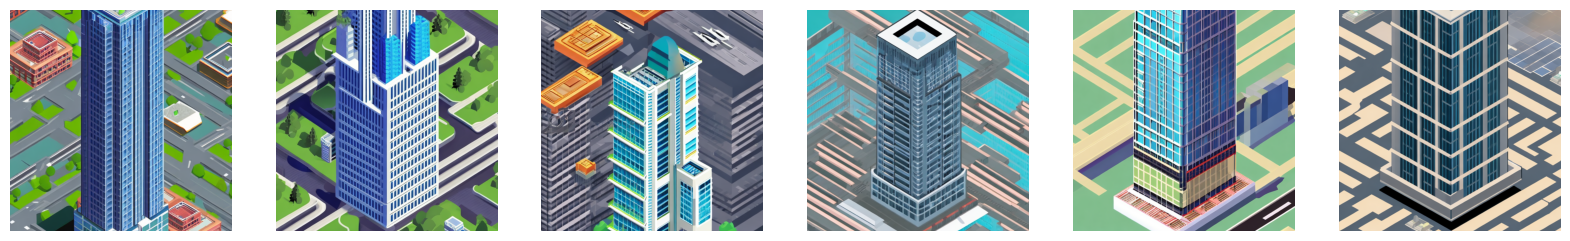

In [ ]:
plot_images(images)

In [ ]:
# Flush the GPU memory to be able to run the training
del pipe
del images

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!git clone https://github.com/loulblemo/city_building_skyscrapers.git
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'city_building_skyscrapers'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 314 (delta 11), reused 162 (delta 10), pack-reused 149
Receiving objects: 100% (314/314), 265.95 MiB | 27.57 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Cloning into 'diffusers'...
remote: Enumerating objects: 61583, done.
remote: Counting objects: 100% (14894/14894), done.
remote: Compressing objects: 100% (1326/1326), done.
remote: Total 61583 (delta 14269), reused 13726 (delta 13516), pack-reused 46689
Receiving objects: 100% (61583/61583), 41.76 MiB | 25.33 MiB/s, done.
Resolving deltas: 100% (45171/45171), done.


In [ ]:
%env dataset_name=city_building_skyscrapers
%env max_training_epochs = 50

env: dataset_name=city_building_skyscrapers
env: max_training_epochs=50


In [ ]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$dataset_name \
  --use_ema \
  --use_8bit_adam \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=$max_training_epochs \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir="city-building-model"

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2024-05-04 14:45:54.316793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 14:45:54.316844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 14:45:54.318605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained('city-building-model', torch_dtype=torch.float16)
pipe = pipe.to("cuda")
prompt = "isometric view of a skyscraper in the style of a city building game"
images = pipe(prompt, num_images_per_prompt=6).images

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

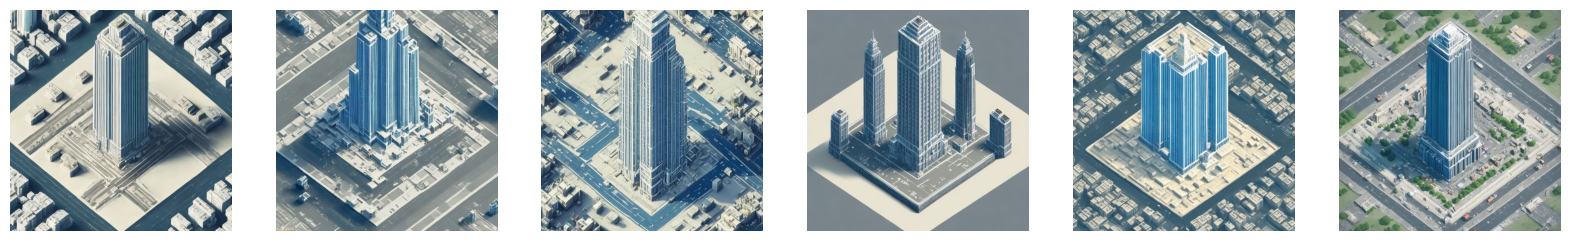

In [ ]:
plot_images(images)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive

 2019-Calendar.gsheet
 32775768_20205813_1209.csv
 4_5931337092608035015.py.gdoc
'4 5 Slides - Presentation.gslides'
'4 5 Tirade.gdoc'
'4 5 Tirade - Presentation - Column chart 1.gsheet'
'4 5 Tirade presentation.gslides'
'Ada network configs.gdoc'
 Admin
 AIBrain.gdoc
 AIBrain.gslides
'AI brain notes.gdoc'
'AIBrain Proposal & Brainstorm.gdoc'
 Albero-genealogico-gramps-with-media.gpkg
 all_hostelworld_hostels.pdf
'Application Mistake Cover Letter.gdoc'
'April Plan.gdoc'
'ArRoma!.gmap'
'Asia Photos'
'Asia Trip'
'Asia Trip - China'
'Asia Trip - China (old)'
'Asia Trip - Japan I'
'Asia Trip - Japan II'
'Asia Trip - Korea'
'Asia Trip - Taiwan'
 a-trip-to-asia
 Audio_recordings
 Australia
'Australia Trip.gsheet'
'Avventura Testuale by James e Gabbo.zip'
'Awesome TODO list template.gsheet'
'Batch_3494216_batch_results (1).csv'
'Batch_3494216_batch_results (2) (1).csv'
'Batch_3494216_batch_results (2) (1).gsheet'
'Batch_3494216_batch_results (2) (2).csv'
'Batch_3494216_batch_results (2).csv'


In [ ]:
!cp -r city-building-model /content/gdrive/MyDrive